In [47]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('/content/Superstore.csv', encoding='ISO-8859-1')


In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Key Columns in the Dataset:

Order ID: Unique identifier for each order.

Order Date: Date when the order was placed.

Customer ID: Unique identifier for each customer.

Customer Name: Name of the customer.

Segment: Customer segment (e.g., Consumer, Corporate).

Country: Country where the customer is located.

City: City of the customer.

State: State of the customer.

Region: Region of the customer.

Product ID: Unique identifier for each product.

Category: Product category (e.g., Furniture, Office Supplies).

Sub-Category: Sub-category of the product.

Product Name: Name of the product.

Sales: Sales amount for each order.

Quantity: Quantity of the product ordered.

Discount: Discount applied to the order.

Profit: Profit generated from the order.

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.isnull().sum()  # Check for missing values in the dataset


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [16]:
for i in df.columns:
  print(i,df[i].nunique())

Row ID 9994
Order ID 5009
Order Date 1238
Ship Date 1334
Ship Mode 4
Customer ID 793
Customer Name 793
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Product ID 1862
Category 3
Sub-Category 17
Product Name 1841
Sales 5825
Quantity 14
Discount 12
Profit 7287


In [19]:
df['Segment'].value_counts()

,count
Segment,
Consumer,5191
Corporate,3020
Home Office,1783


## **VALUE_COUNT ANLAYSIS IN EACH CATAGORICAL COUMN**

In [21]:
df['City'].value_counts()


,count
City,
New York City,915
Los Angeles,747
Philadelphia,537
San Francisco,510
Seattle,428
...,...
Glenview,1
Missouri City,1
Rochester Hills,1


In [22]:
df['State'].value_counts()


,count
State,
California,2001
New York,1128
Texas,985
Pennsylvania,587
Washington,506
Illinois,492
Ohio,469
Florida,383
Michigan,255


In [24]:
df['Region'].value_counts()


,count
Region,
West,3203
East,2848
Central,2323
South,1620


In [26]:
df['Category'].value_counts()


,count
Category,
Office Supplies,6026
Furniture,2121
Technology,1847


In [27]:
df['Sub-Category'].value_counts()

,count
Sub-Category,
Binders,1523
Paper,1370
Furnishings,957
Phones,889
Storage,846
Art,796
Accessories,775
Chairs,617
Appliances,466


In [28]:
df['Product Name'].value_counts()

,count
Product Name,
Staples,227
Avery Non-Stick Binders,20
KI Adjustable-Height Table,18
Storex Dura Pro Binders,17
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling,15
...,...
Boston 1900 Electric Pencil Sharpener,1
RCA ViSYS 25423RE1 Corded phone,1
"Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner",1


In [29]:
df['Quantity'].value_counts()

,count
Quantity,
3,2409
2,2402
5,1230
4,1191
1,899
7,606
6,572
9,258
8,257


In [30]:
df['Discount'].value_counts()

,count
Discount,
0.00,4798
0.20,3657
0.70,418
0.80,300
0.30,227
0.40,206
0.60,138
0.10,94
0.50,66


## **VISUALIZING DISTRIBUTIONS :**

### SALES DISTRIBUTION

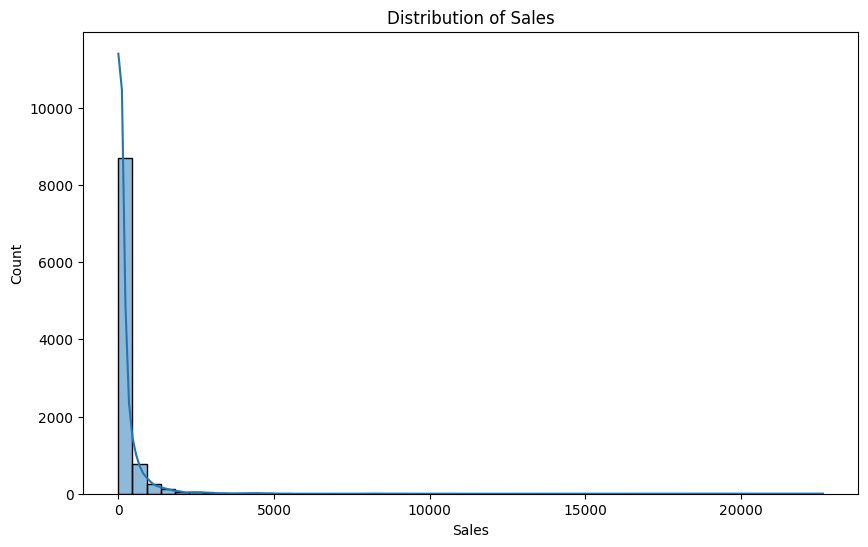

In [31]:


plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.show()


 heavily skewed to the right, indicating that most of the sales values are relatively low, with a few higher sales values creating a long tail.

 This suggests that the majority of transactions involve smaller sales amounts, while only a few transactions contribute significantly larger sales amounts.

### PROFITS DISTRIBUTION

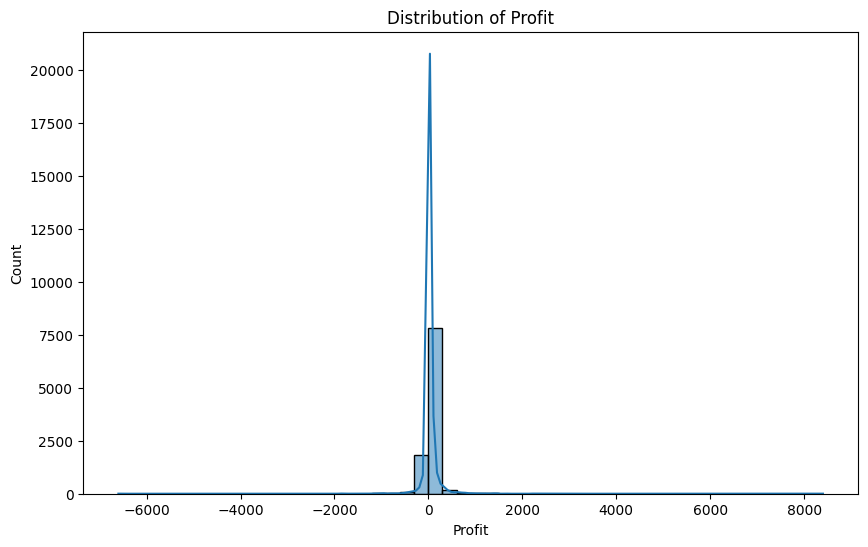

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], bins=50, kde=True)
plt.title('Distribution of Profit')
plt.show()


The distribution of profit shows a sharp peak around zero, indicating that most transactions yield either very small profits or slight losses.

### Correlation Heatmap

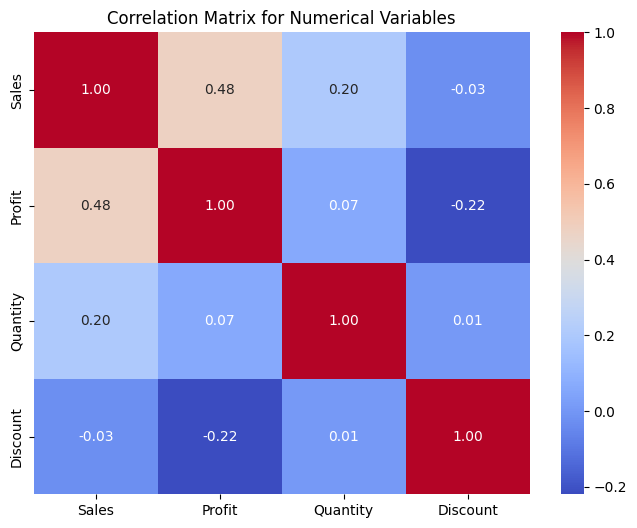

In [38]:
# Select only the numerical variables
numerical_vars = df[['Sales', 'Profit', 'Quantity', 'Discount']]

# Calculate the correlation matrix
correlation_matrix = numerical_vars.corr()

# Display the correlation matrix
correlation_matrix


# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

Sales and Profit: There is a moderate positive correlation (0.48) between sales and profit, indicating that higher sales generally lead to higher profits.

Discount and Profit: There is a weak negative correlation (-0.22) between discount and profit, suggesting that higher discounts tend to reduce profit, though the relationship is not very strong.

Sales and Quantity: There is a weak positive correlation (0.20) between sales and quantity, indicating a slight tendency for higher quantities sold to be associated with higher sales.

Discount and Sales: The correlation between discount and sales is almost negligible (-0.03), suggesting that discounts do not significantly impact the sales amount in this dataset.

### Segment Distribution:

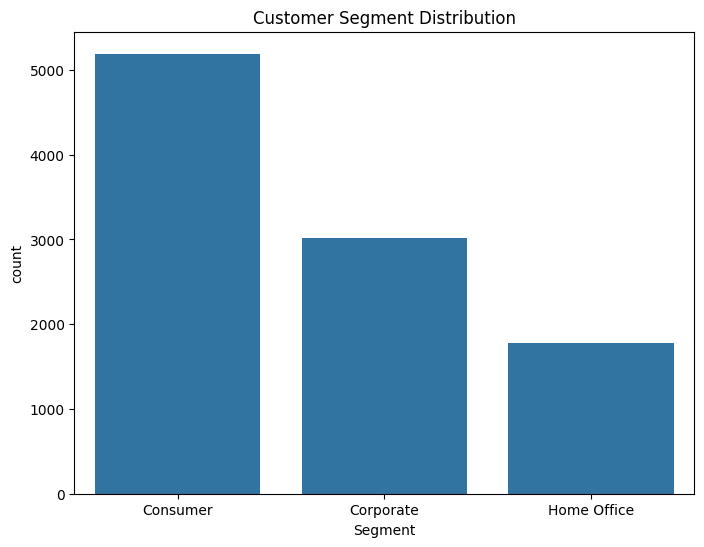

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Segment', data=df)
plt.title('Customer Segment Distribution')
plt.show()



### Category Distribution:

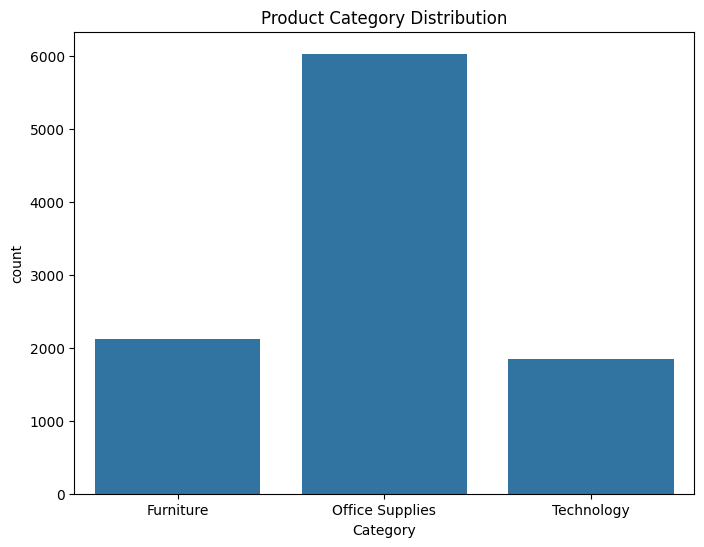

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=df)
plt.title('Product Category Distribution')
plt.show()


### feature engineering

In [41]:
df['Order_Ship_Duration'] = (df['Ship Date'] - df['Order Date']).dt.days


In [42]:
df['Sales_per_Quantity'] = df['Sales'] / df['Quantity']


In [43]:

# Select the relevant features for clustering
#features = df[['Sales', 'Profit', 'Quantity', 'Discount']]

# If you have additional features like Order_Ship_Duration or Sales_per_Quantity, include them
features = df[['Sales', 'Profit', 'Quantity', 'Discount', 'Order_Ship_Duration', 'Sales_per_Quantity']]

# Display the first few rows of the selected features
features.head()


,Sales,Profit,Quantity,Discount,Order_Ship_Duration,Sales_per_Quantity
0,261.9600,41.9136,2,0.00,3,130.9800
1,731.9400,219.5820,3,0.00,3,243.9800
2,14.6200,6.8714,2,0.00,4,7.3100
3,957.5775,-383.0310,5,0.45,7,191.5155
4,22.3680,2.5164,2,0.20,7,11.1840


scale the data

In [44]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_features = scaler.fit_transform(features)

# Convert the scaled data back into a DataFrame for easier interpretation
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Display the first few rows of the scaled features
scaled_features_df.head()


,Sales,Profit,Quantity,Discount,Order_Ship_Duration,Sales_per_Quantity
0,0.051510,0.056593,-0.804303,-0.756643,-0.548867,0.490206
1,0.805633,0.815054,-0.354865,-0.756643,-0.548867,1.280857
2,-0.345368,-0.093002,-0.804303,-0.756643,0.023540,-0.375101
3,1.167688,-1.757484,0.544012,1.423149,1.740761,0.913768
4,-0.332935,-0.111593,-0.804303,0.212153,1.740761,-0.347995


### K-Means Clustering

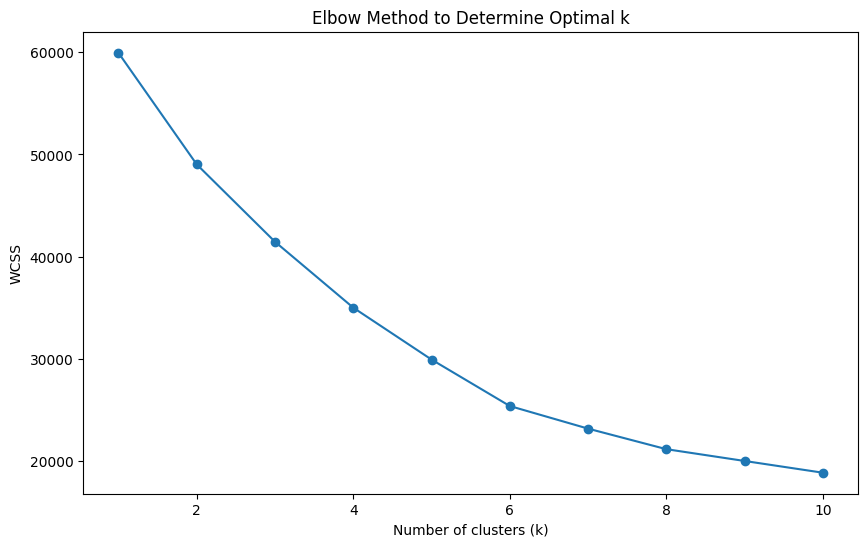

In [48]:


# Calculate the within-cluster sum of squares for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [49]:
# Assuming k=5 based on the Elbow Method (you can adjust based on the actual graph)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features_df)

# Display the first few rows with the cluster labels
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_Ship_Duration,Sales_per_Quantity,Cluster
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,130.9800,1
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,243.9800,1
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4,7.3100,0
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,191.5155,2
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,11.1840,0


In [53]:
# Exclude 'Row ID' and 'Postal Code' from the numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop(['Row ID', 'Postal Code'])

# Group by 'Cluster' and calculate the mean for the selected numeric columns
cluster_analysis = df.groupby('Cluster')[numeric_columns].mean()

# Display the result
cluster_analysis


,Sales,Quantity,Discount,Profit,Order_Ship_Duration,Sales_per_Quantity
Cluster,,,,,,
0,122.935168,2.880430,0.097887,19.621855,4.987136,47.577182
1,144.451145,3.046222,0.100201,22.356994,1.807878,52.004471
2,126.786577,3.872033,0.688184,-106.056178,4.043344,33.015466
3,6500.674947,4.578947,0.073684,2111.708271,4.052632,1528.670289
4,560.595334,7.233352,0.101286,91.206321,4.180990,93.198973


Summary of Customer Segments:

Cluster 0: Low quantity, moderate sales, and profit, with a modest discount rate.

Cluster 1: Higher sales and quantity, with good profit and efficient order handling.

Cluster 2: High discounts lead to negative profits, though quantity and sales are moderate.

Cluster 3: Premium segment with extremely high sales and profit, likely large or high-value orders.

Cluster 4: High quantity of items per order with good profit, indicating bulk or frequent purchases.

### **VISUALIZING CLUSTER**

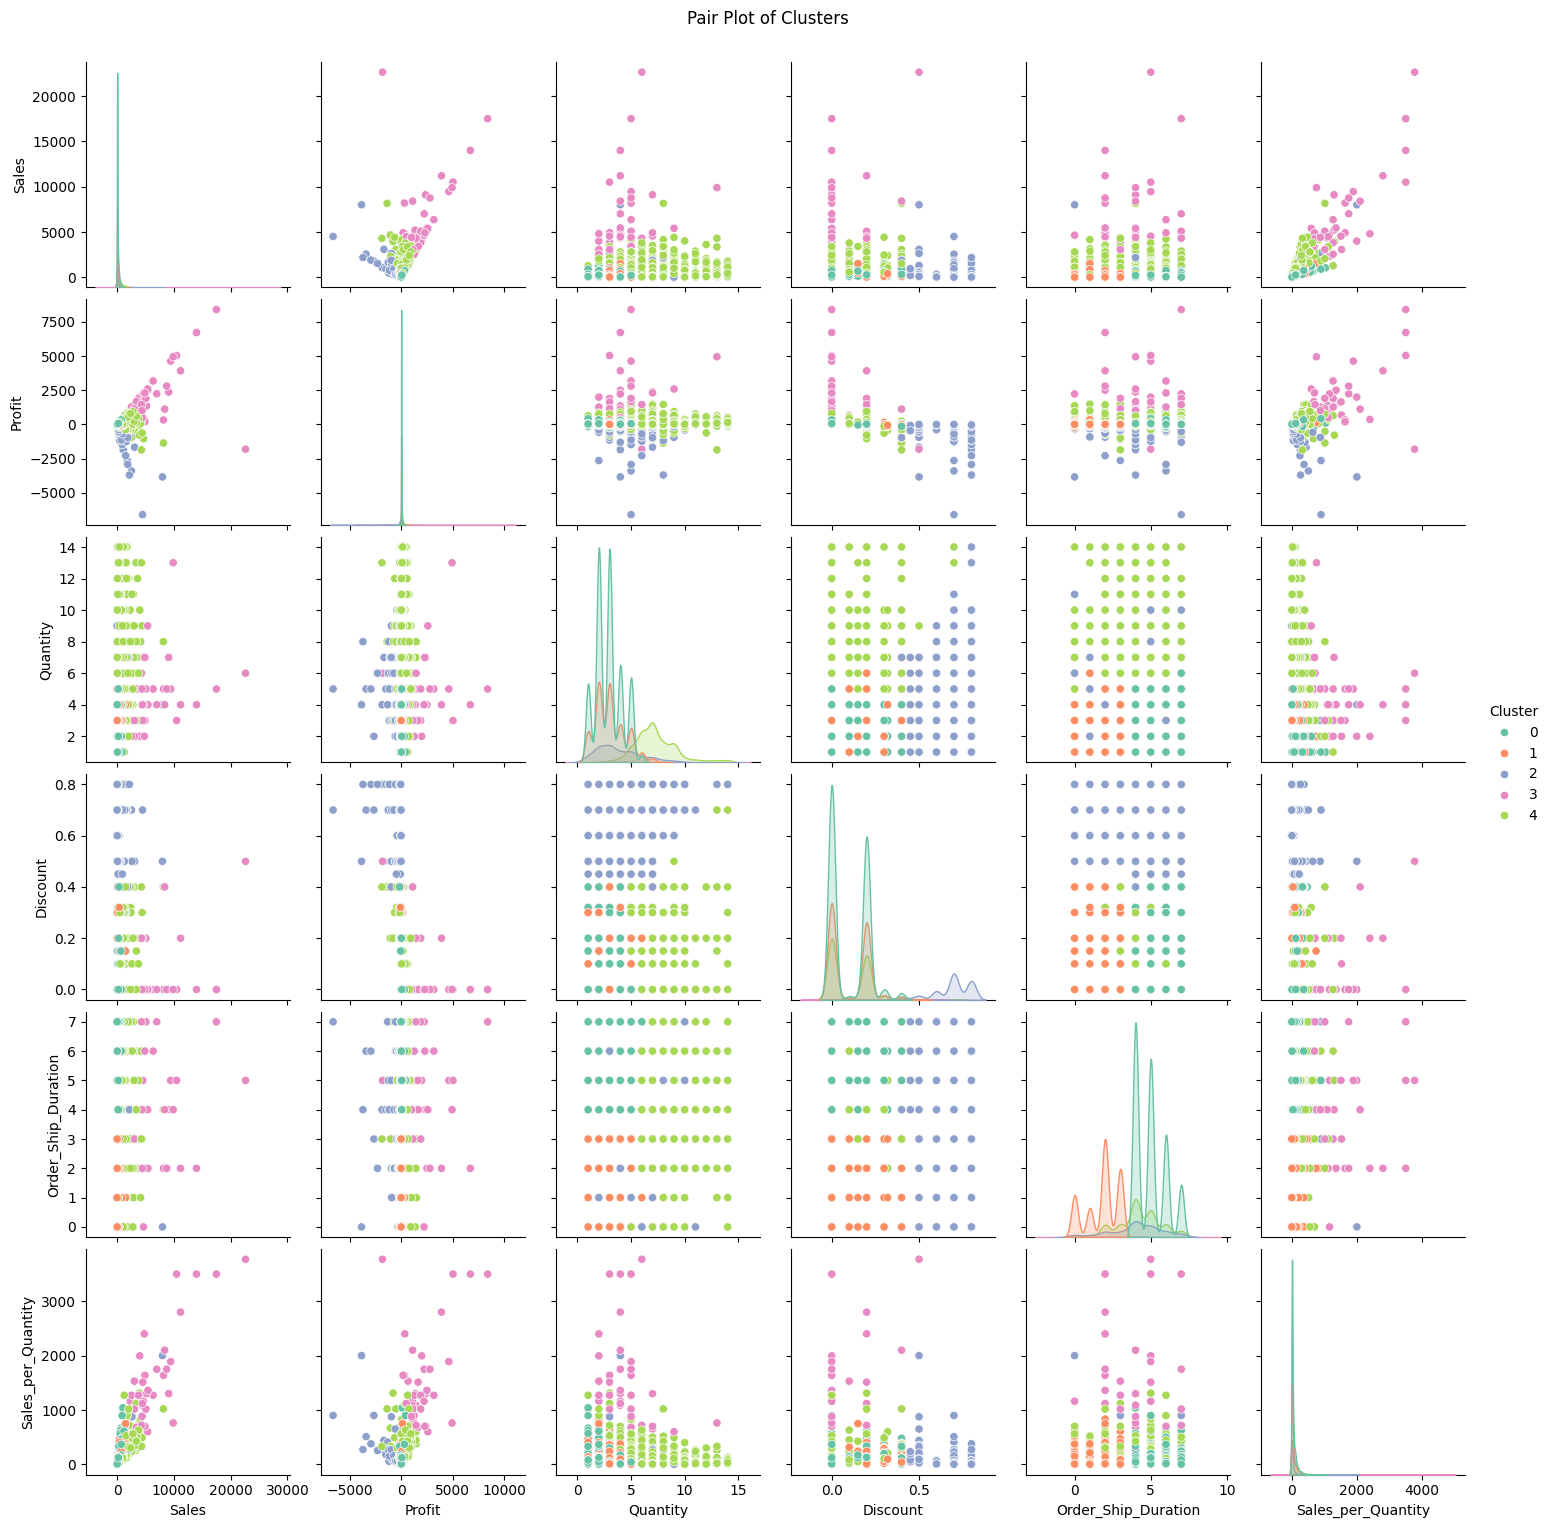

In [54]:
# Select features to include in the pair plot
features_to_plot = ['Sales', 'Profit', 'Quantity', 'Discount', 'Order_Ship_Duration', 'Sales_per_Quantity']
# Pair plot colored by cluster
sns.pairplot(df, hue='Cluster', vars=features_to_plot, palette='Set2')
plt.suptitle('Pair Plot of Clusters', y=1.02)
plt.show()


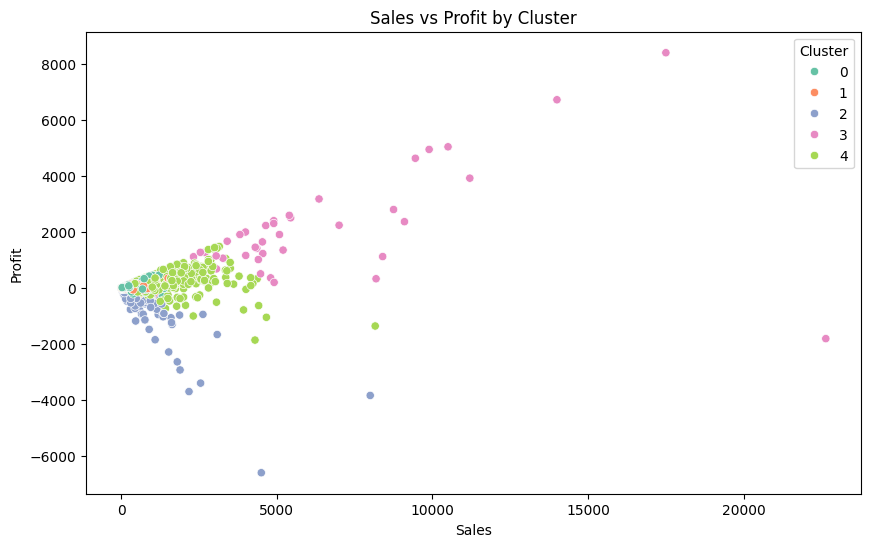

In [55]:
# Scatter plot for Sales vs Profit, colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', hue='Cluster', data=df, palette='Set2')
plt.title('Sales vs Profit by Cluster')
plt.show()


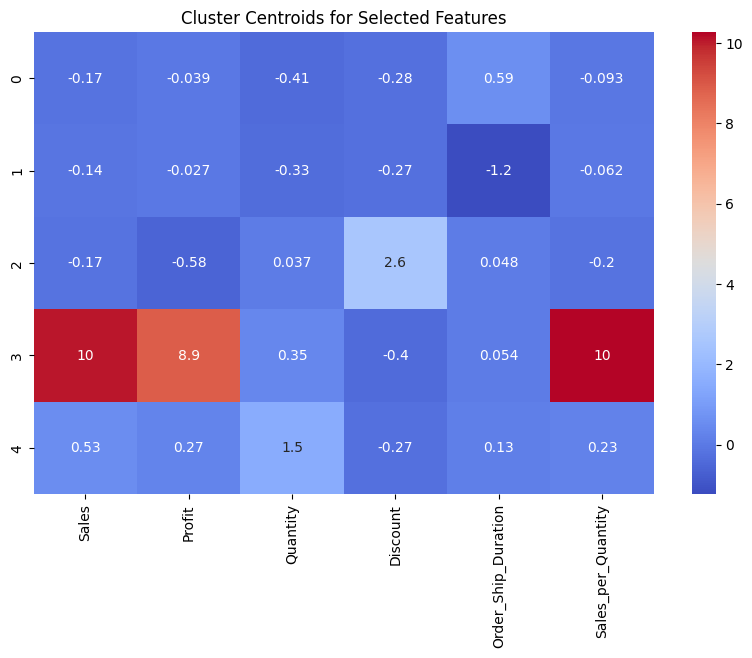

In [56]:
# Plotting the cluster centroids
cluster_centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(cluster_centroids, columns=features_to_plot)

plt.figure(figsize=(10, 6))
sns.heatmap(centroids_df, annot=True, cmap='coolwarm')
plt.title('Cluster Centroids for Selected Features')
plt.show()


**Cluster 3**: The red color in Sales and Profit indicates that this cluster has significantly **higher average sales and profit** compared to the other clusters. This suggests that Cluster 3 represents the most profitable customer segment.

**Cluster 2:** The lighter blue in Order_Ship_Duration suggests that this cluster has **longer average shipping times**. The near-zero values in Sales_per_Quantity indicate that this cluster might not be very profitable despite longer processing times.

**Cluster 4:** This cluster shows **moderate positive values** in Sales, Profit, and Quantity, indicating it is a balanced cluster with decent sales and profits.

**Clusters 0 and 1:** These clusters show darker blue in most features, indicating **lower values** for Sales, Profit, Quantity, etc. These clusters likely represent less active or **less profitable segments**.